**TEST SCORE ANALYSIS**

In [134]:
import pandas as pd
df = pd.read_csv('exams.csv')

In [135]:
df.head(22)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86
5,male,group C,some high school,standard,none,68,57,54
6,female,group E,associate's degree,standard,none,82,83,80
7,female,group B,some high school,standard,none,46,61,58
8,male,group C,some high school,standard,none,80,75,73
9,female,group C,bachelor's degree,standard,completed,57,69,77


In [136]:
df.index = range(1, len(df) + 1)
df.index.name = 'student'

In [137]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
student,,,,,,,,
1,female,group D,some college,standard,completed,59,70,78
2,male,group D,associate's degree,standard,none,96,93,87
3,female,group D,some college,free/reduced,none,57,76,77
4,male,group B,some college,free/reduced,none,70,70,63
5,female,group D,associate's degree,standard,none,83,85,86
...,...,...,...,...,...,...,...,...
996,male,group C,some college,standard,none,77,77,71
997,male,group C,some college,standard,none,80,66,66
998,female,group A,high school,standard,completed,67,86,86


In [138]:
df.shape

(1000, 8)

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 1 to 1000
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


**MATH SCORE ANALYSIS**

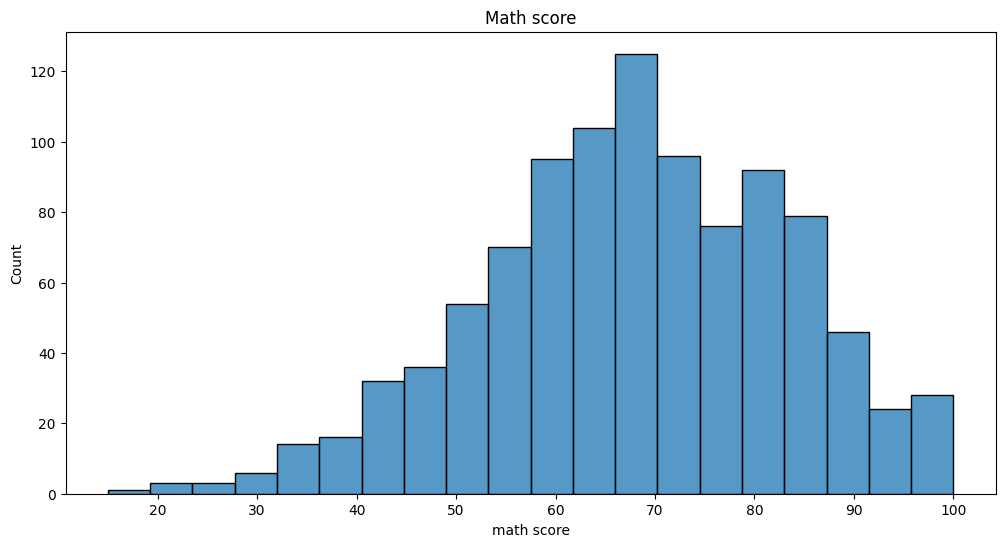

In [140]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
sns.histplot(data = df, x='math score')
plt.locator_params(axis="x", nbins=10)
plt.title('Math score')
plt.show()

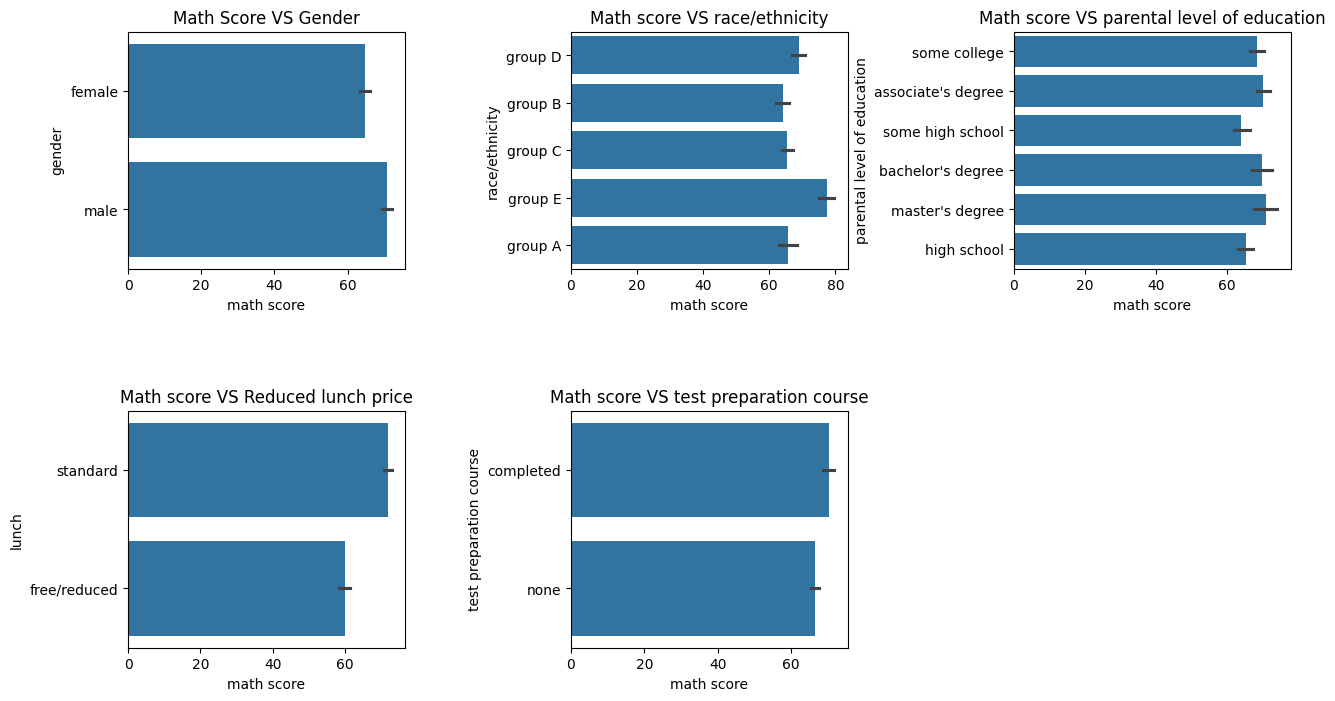

In [141]:
fig, ax = plt.subplots(2, 3, figsize=(15, 8))
sns.barplot(data = df, x='math score', y='gender', ax=ax[0, 0])
plt.subplots_adjust(wspace=0.6, hspace=0.6)
ax[0, 0].set_title('Math Score VS Gender')
sns.barplot(data = df, x='math score', y='race/ethnicity', ax=ax[0, 1])
ax[0, 1].set_title('Math score VS race/ethnicity')
sns.barplot(data = df, x='math score', y='parental level of education', ax=ax[0, 2])
ax[0, 2].set_title('Math score VS parental level of education')
sns.barplot(data = df, x='math score', y='lunch', ax=ax[1, 0])
ax[1, 0].set_title('Math score VS Reduced lunch price')
sns.barplot(data = df, x='math score', y='test preparation course', ax=ax[1, 1])
ax[1, 1].set_title('Math score VS test preparation course')
fig.delaxes(ax[1, 2])
plt.show()

In [142]:
def count_conditions(row):
    condition = 0
    if row['race/ethnicity'] == 'group E':
        condition += 1
    if row['parental level of education'] == "master's degree":
        condition += 1
    if row['lunch'] == 'standard':
        condition += 1
    if row['test preparation course'] == 'completed':
        condition += 1
    return condition

df['condition_count'] = df.apply(count_conditions, axis=1)

<Axes: xlabel='condition_count', ylabel='Count'>

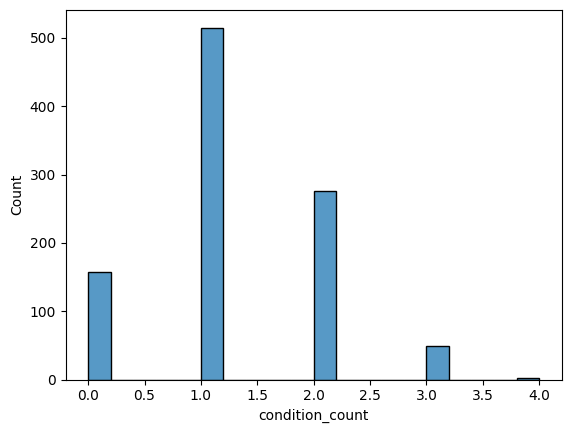

In [143]:
sns.histplot(data = df, x='condition_count')

<Axes: xlabel='condition_count', ylabel='math score'>

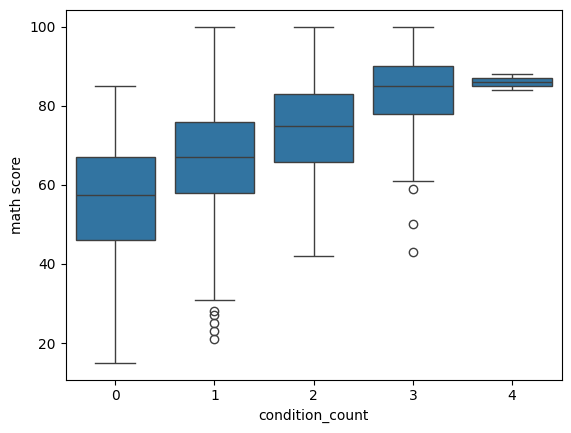

In [144]:
sns.boxplot(data=df, x='condition_count', y='math score')

<Axes: xlabel='condition_count', ylabel='math score'>

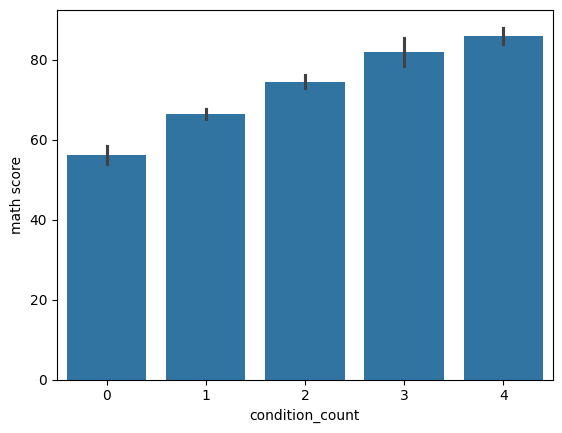

In [145]:
sns.barplot(data=df, x='condition_count', y='math score')

**READING SCORE ANALYSIS**

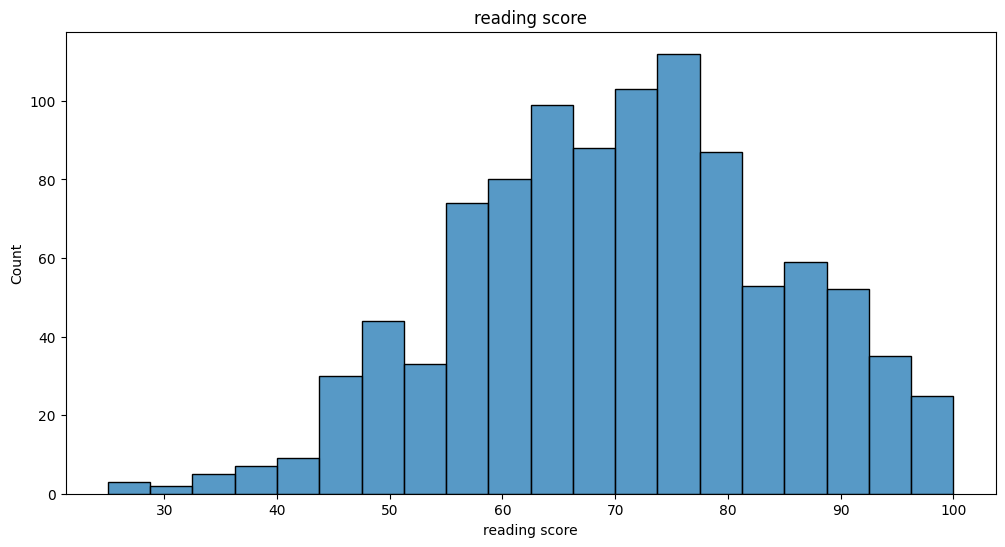

In [146]:
plt.figure(figsize=(12, 6))
sns.histplot(data = df, x='reading score')
plt.locator_params(axis="x", nbins=10)
plt.title('reading score')
plt.show()

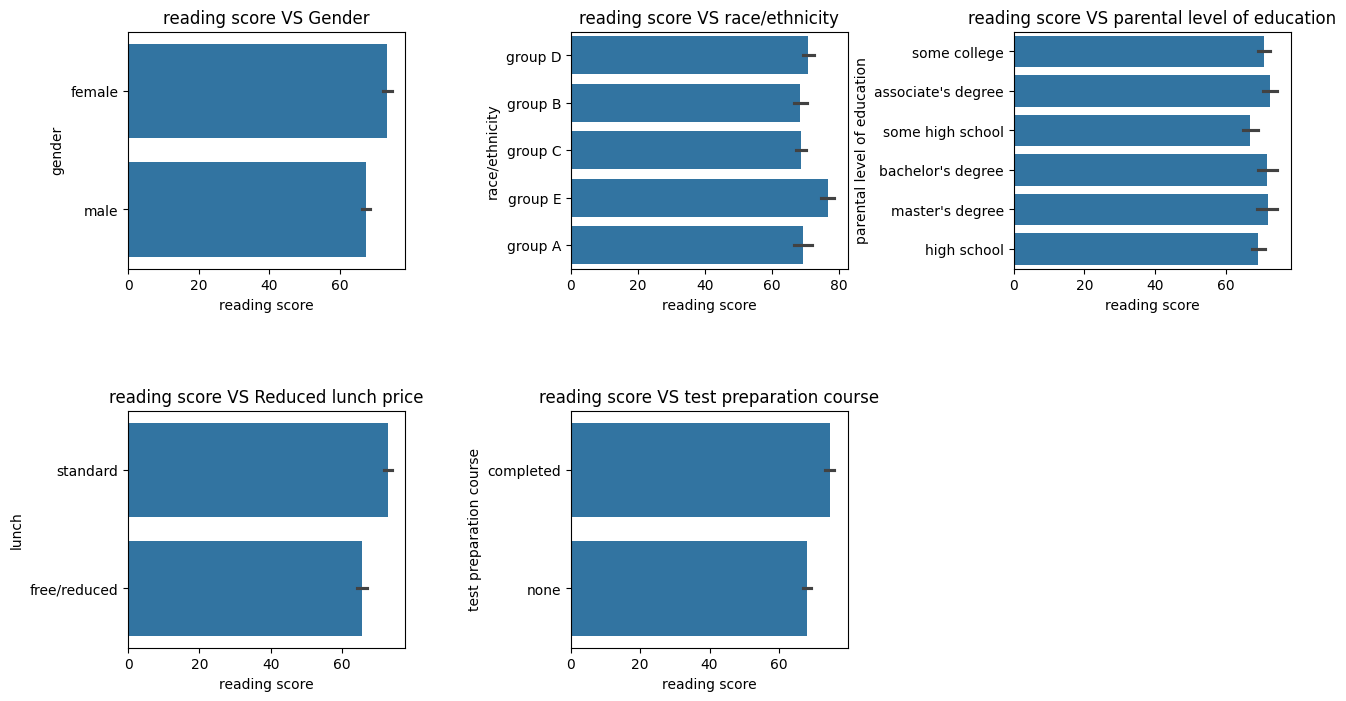

In [147]:
fig, ax = plt.subplots(2, 3, figsize=(15, 8))
sns.barplot(data = df, x='reading score', y='gender', ax=ax[0, 0])
plt.subplots_adjust(wspace=0.6, hspace=0.6)
ax[0, 0].set_title('reading score VS Gender')
sns.barplot(data = df, x='reading score', y='race/ethnicity', ax=ax[0, 1])
ax[0, 1].set_title('reading score VS race/ethnicity')
sns.barplot(data = df, x='reading score', y='parental level of education', ax=ax[0, 2])
ax[0, 2].set_title('reading score VS parental level of education')
sns.barplot(data = df, x='reading score', y='lunch', ax=ax[1, 0])
ax[1, 0].set_title('reading score VS Reduced lunch price')
sns.barplot(data = df, x='reading score', y='test preparation course', ax=ax[1, 1])
ax[1, 1].set_title('reading score VS test preparation course')
fig.delaxes(ax[1, 2])
plt.show()

<Axes: xlabel='condition_count', ylabel='reading score'>

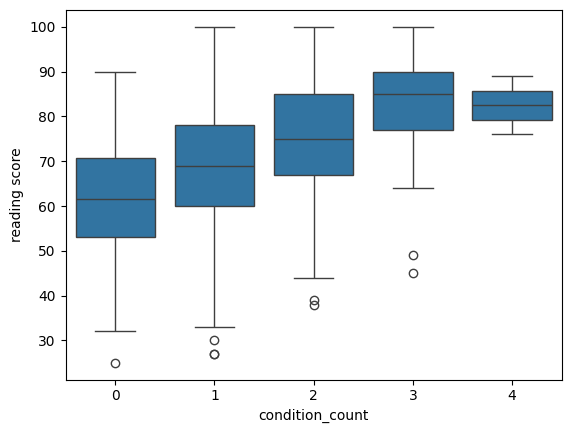

In [148]:
sns.boxplot(data=df, x='condition_count', y='reading score')

<Axes: xlabel='condition_count', ylabel='reading score'>

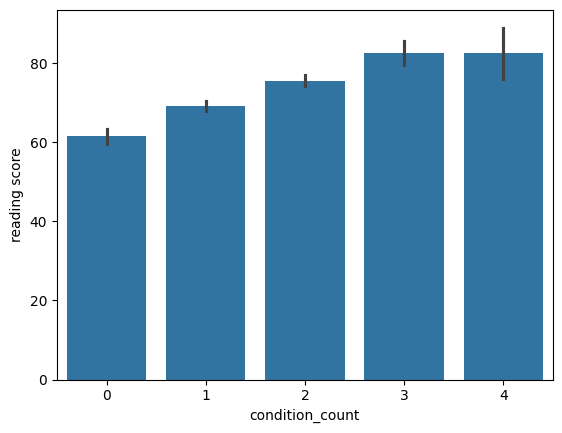

In [149]:
sns.barplot(data=df, x='condition_count', y='reading score')

**WRITING SCORE ANALYSIS**

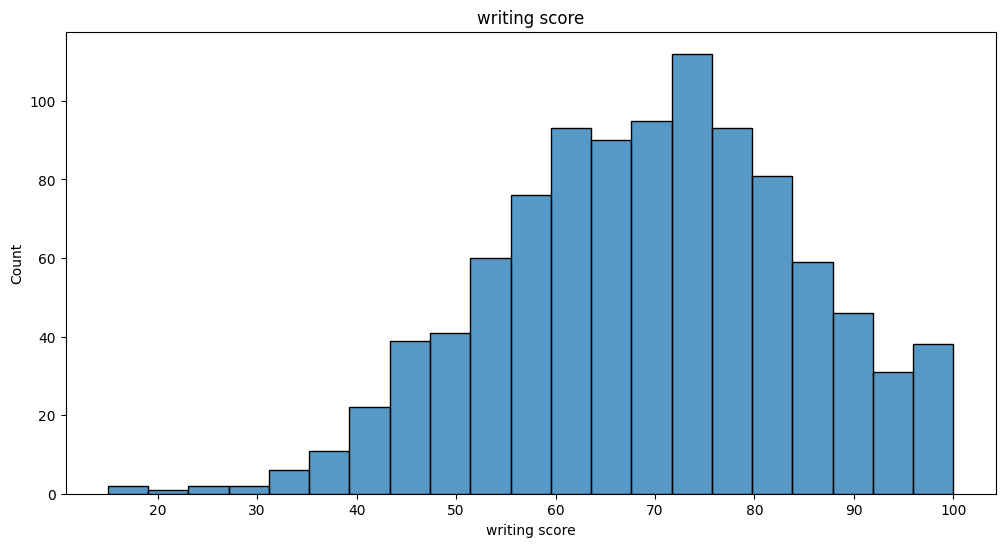

In [150]:
plt.figure(figsize=(12, 6))
sns.histplot(data = df, x='writing score')
plt.locator_params(axis="x", nbins=10)
plt.title('writing score')
plt.show()

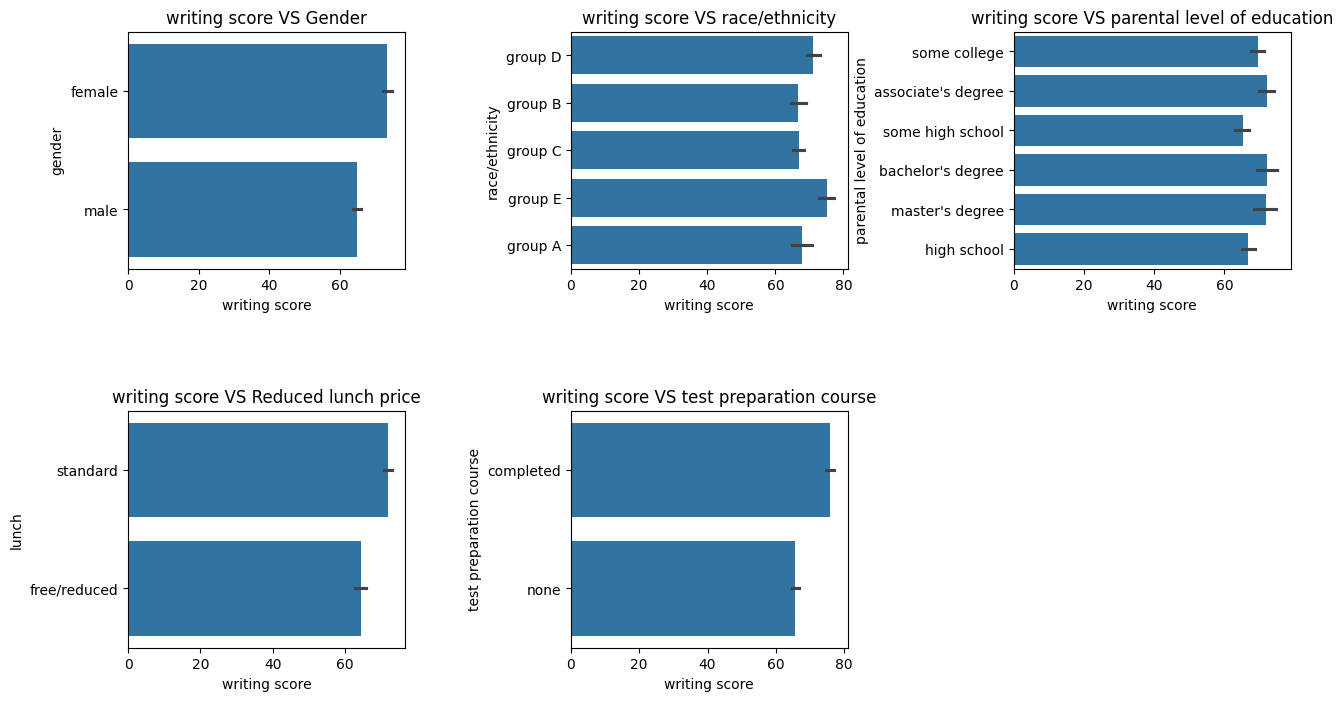

In [151]:
fig, ax = plt.subplots(2, 3, figsize=(15, 8))
sns.barplot(data = df, x='writing score', y='gender', ax=ax[0, 0])
plt.subplots_adjust(wspace=0.6, hspace=0.6)
ax[0, 0].set_title('writing score VS Gender')
sns.barplot(data = df, x='writing score', y='race/ethnicity', ax=ax[0, 1])
ax[0, 1].set_title('writing score VS race/ethnicity')
sns.barplot(data = df, x='writing score', y='parental level of education', ax=ax[0, 2])
ax[0, 2].set_title('writing score VS parental level of education')
sns.barplot(data = df, x='writing score', y='lunch', ax=ax[1, 0])
ax[1, 0].set_title('writing score VS Reduced lunch price')
sns.barplot(data = df, x='writing score', y='test preparation course', ax=ax[1, 1])
ax[1, 1].set_title('writing score VS test preparation course')
fig.delaxes(ax[1, 2])
plt.show()

<Axes: xlabel='condition_count', ylabel='writing score'>

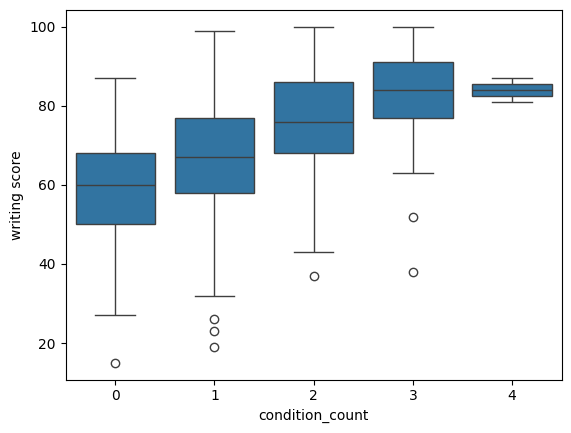

In [152]:
sns.boxplot(data=df, x='condition_count', y='writing score')

<Axes: xlabel='condition_count', ylabel='writing score'>

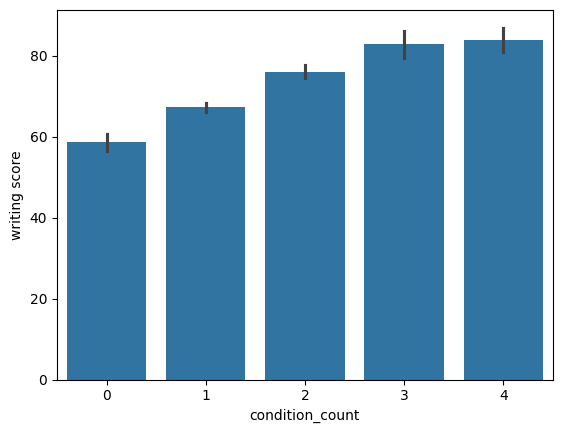

In [153]:
sns.barplot(data=df, x='condition_count', y='writing score')

**TOOLS & PREDICTIONS**

In [154]:
df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,condition_count
student,,,,,,,,,
1,female,group D,some college,standard,completed,59,70,78,2
2,male,group D,associate's degree,standard,none,96,93,87,1
3,female,group D,some college,free/reduced,none,57,76,77,0
4,male,group B,some college,free/reduced,none,70,70,63,0
5,female,group D,associate's degree,standard,none,83,85,86,1


In [155]:
df['condition_count'].sum()

np.int64(1222)

In [156]:
sorted_values = df.sort_values(by='condition_count', ascending = False)
sorted_values.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,condition_count
student,,,,,,,,,
767,male,group E,master's degree,standard,completed,88,89,87,4
876,male,group E,master's degree,standard,completed,84,76,81,4
837,female,group A,master's degree,standard,completed,68,76,76,3
804,female,group E,bachelor's degree,standard,completed,92,87,92,3
781,male,group E,some college,standard,completed,90,93,91,3


<Axes: xlabel='condition_count', ylabel='writing score'>

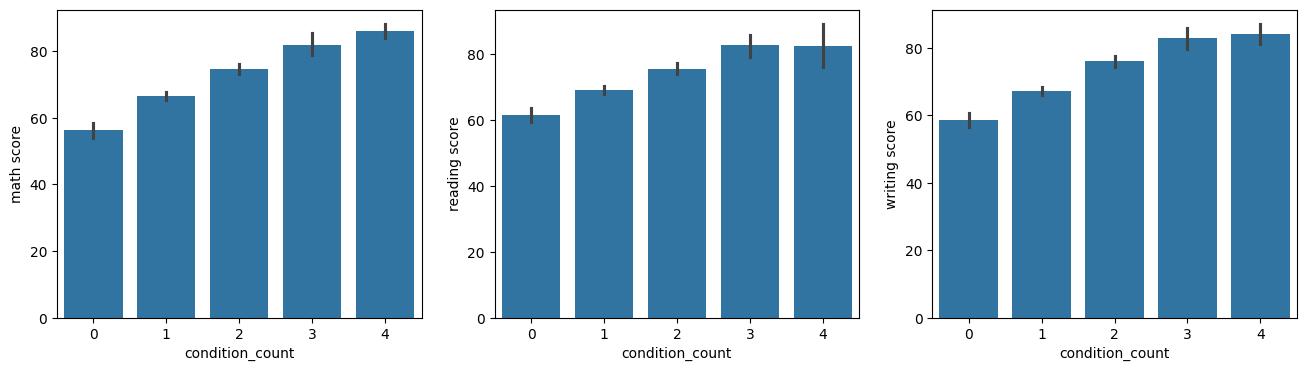

In [157]:
fig, ax = plt.subplots(1, 3, figsize=(16, 4))
sns.barplot(data = df, x='condition_count', y='math score', ax=ax[0])
sns.barplot(data = df, x='condition_count', y='reading score', ax=ax[1])
sns.barplot(data = df, x='condition_count', y='writing score', ax=ax[2])

In [230]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X = df[['math score', 'reading score', 'writing score']]
Y = df['condition_count']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.8)
model = LogisticRegression()

In [231]:
y_train.shape # 20% of the whole dataset

(200,)

In [232]:
model.fit(x_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [233]:
df["predicted_values"] = model.predict(X).round()

In [234]:
df['predicted_values'].value_counts()

,count
predicted_values,
1,742
2,226
0,32


In [235]:
df['condition_count'].value_counts()

,count
condition_count,
1,515
2,276
0,158
3,49
4,2


,count
True,542
False,458


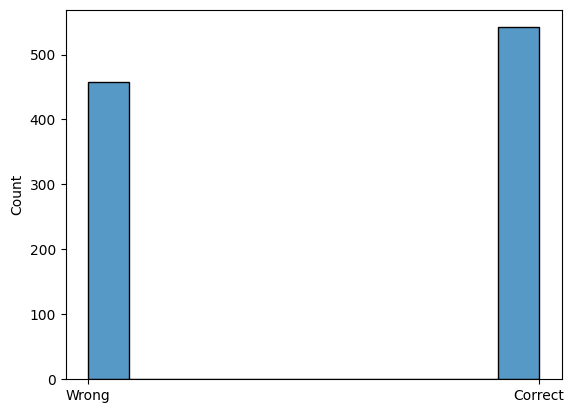

In [236]:
correc = df['predicted_values'] == df['condition_count']
sns.histplot(correc)
plt.xticks([0, 1], ['Wrong', 'Correct'])
correc.value_counts() # 54.6% Correct prediction

In [200]:
df['condition_count'].value_counts()

,count
condition_count,
1,515
2,276
0,158
3,49
4,2


In [201]:
df['predicted_values'].value_counts()

,count
predicted_values,
1.0,713
2.0,232
0.0,55
